In [1]:
import matplotlib.pyplot as plt
import os
import seaborn as sns
import pandas as pd
import numpy as np
import sys

In [2]:
method = ['gpy_mle0133', 'gpy_mle3021']
dataset = ['borehole', '20d']
output = 'f_1'

In [70]:
tips = sns.load_dataset('tips')

In [3]:
def get_problem_and_dimension(file):
    splited_file_name = file.split('_')

    problem = "_".join(file.split('_')[0:(len(splited_file_name) - 1)])
    d = splited_file_name[len(splited_file_name) - 1].replace('.csv', '')

    return problem, d

#--- Let's do the job ---
data_dir = os.path.join(os.getcwd(), '..', '..', 'results', 'bench2', 'data', str(method[0]))

data_dir_full = os.path.join(os.getcwd(), '..', '..', 'results', 'bench1', 'data', str(method[0]))

data_dir_1 = os.path.join(os.getcwd(), '..', '..', 'results', 'bench2', 'data', str(method[1]))

data_dir_full_1 = os.path.join(os.getcwd(), '..', '..', 'results', 'bench1', 'data', str(method[1]))


In [9]:
data_dir

'/media/subhasish/Professional/L2S/gitlab_repos/benchmark_mle/code/report/../../results/bench2/data/gpy_mle0133'

In [4]:

def df_generator(data_dir, tag):
    for file in os.listdir(data_dir):
        problem, d = get_problem_and_dimension(file)

        if [problem, d] == dataset :

            data = pd.read_csv(os.path.join(data_dir, file), sep=',', index_col=0)
            df = pd.DataFrame(data)

            ls = []
            to_remove = []
            for i in df.columns:
                if 'ls_dim' in i:
                    ls.append(i)
                else:
                    to_remove.append(i)

            df = df.loc[df['output'] == output]

            for i in ls:
                df[i] = np.log(df[i])
            df = df.dropna()
            df = df.drop(to_remove, axis = 1)
            df['method'] = np.array(df.shape[0]*[tag])
    return df


In [5]:
df = df_generator(data_dir, 'default')
df_full = df_generator(data_dir_full, 'default')
df_1 = df_generator(data_dir_1, 'healed')
df_full_1 = df_generator(data_dir_full_1, 'healed')

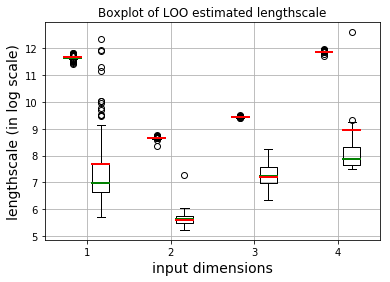

In [39]:
# data to plot
A= [df['ls_dim_5'],  df_1['ls_dim_5']]
B = [df['ls_dim_6'],  df_1['ls_dim_6']]
C = [df['ls_dim_7'],  df_1['ls_dim_7']]
D = [df['ls_dim_8'],  df_1['ls_dim_8']]

A_1= [df_full['ls_dim_5'],  df_full_1['ls_dim_5']]
B_1 = [df_full['ls_dim_6'],  df_full_1['ls_dim_6']]
C_1 = [df_full['ls_dim_7'],  df_full_1['ls_dim_7']]
D_1 = [df_full['ls_dim_8'],  df_full_1['ls_dim_8']]


def color_scheme(bp, bp_1):
    for median in bp['medians']:
        median.set(color='g', linewidth=2)

    for median in bp_1['medians']:
        median.set(color='r', linewidth=2)

    for box in bp_1['boxes']:
        box.set( color='r', linewidth=2)

    for whisker in bp_1['whiskers']:
        whisker.set(color='r', linewidth=2)

    for cap in bp_1['caps']:
        cap.set(color='r', linewidth=2)

fig = plt.figure()
ax = plt.axes()

# first boxplot pair
bp = ax.boxplot(A, positions = [1, 2], widths = 0.6)
bp_1 = ax.boxplot(A_1, positions = [1, 2], widths = 0.6)
color_scheme(bp, bp_1)

# second boxplot pair
bp = ax.boxplot(B, positions = [4, 5], widths = 0.6)
bp_1 = ax.boxplot(B_1, positions = [4, 5], widths = 0.6)
color_scheme(bp, bp_1)

# thrid boxplot pair
bp = ax.boxplot(C, positions = [7, 8], widths = 0.6)
bp_1 = ax.boxplot(C_1, positions = [7, 8], widths = 0.6)
color_scheme(bp, bp_1)

# fourth boxplot pair
bp = ax.boxplot(D, positions = [10, 11], widths = 0.6)
bp_1 = ax.boxplot(D_1, positions = [10, 11], widths = 0.6)
color_scheme(bp, bp_1)

# set axes limits and labels
plt.xlim(0,12)
#plt.ylim(0,9)
ax.set_xticklabels(['1', '2', '3', '4'])
ax.set_xticks([1.5, 4.5, 7.5, 10.5])

plt.xlabel('input dimensions', fontsize = 14)
plt.ylabel('lengthscale (in log scale)', fontsize = 14)
plt.title('Boxplot of LOO estimated lengthscale')
plt.grid(True)

plt.show()